## Домашняя работа #2.
Эта домашка про Фурье и немного про простейшие фильтры.

**Soft deadline: 02.03.2023 03:00:00 +0003 GMT**

**Hard deadline: 09.03.2023 03:00:00 +0003 GMT**

Ссылка на материалы: https://drive.google.com/drive/folders/1ZHo9MpdaOS1Qwc_F342wTByJNX0eHKmN?usp=sharing

In [ ]:
# ПРИМОНТИРУЙТЕ ДИСК К НОУТБУКУ
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
# ИЗМЕНИТЕ ЭТОТ ПУТЬ НА ТОТ, КУДА ВЫ ПОЛОЖИЛИ МАТЕРИАЛЫ КУРСА
sources_path = Path("/content/drive/MyDrive/materials")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

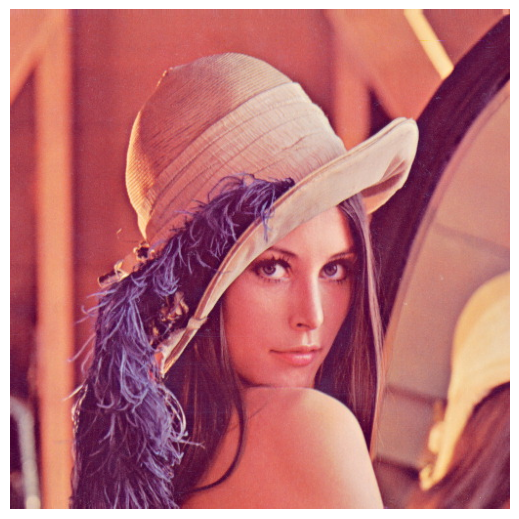

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('default')

def pyplot(func):
    def make_pyplot_context(*args, **kwargs):
        plt.figure(figsize=(10, 5))
        ax = plt.axes([0,0,1,1], frameon=False)
        ax.set_axis_off()
        return func(*args, **kwargs)
    return make_pyplot_context

@pyplot
def show_bgr(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

@pyplot
def show_gray(img):
    plt.imshow(img, cmap='gray')

def mse(img1, img2):
    return ((img1.astype(int) - img2.astype(int)) ** 2).mean()

lena = cv2.imread(str(sources_path / "lena.jpg"))
show_bgr(lena)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. (5 баллов)**

Загрузите изображение $lena.jpg$ (512х512). Переведите изображение в градации серого. Произведите фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) со следующими значениями радиуса фильтров:
1. 5
2. 15
3. 30
4. 255

Для каждого фильтра постройте состыкованное изображение из следующих: исходное изображение в градациях серого, изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), изображение Фурье-спектра после фильтрации, изображение в пространственной области после фильтрации. На выходе должно получиться 8 изображений (4 параметра фильтров х 2 типа фильтров). Функции, которые Вам потребуются: $dft$, $mulSpectrums$, $idft$.

In [ ]:
lena = cv2.imread(str(sources_path / "lena.jpg"))
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

In [ ]:
def get_fourier_transform(img):
  dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
  return dft_shift, magnitude_spectrum

In [ ]:
def low_pass_filter(img, radius):
  height, width, d = img.shape
  center = (width // 2, height // 2)
  circle_mask = np.zeros_like(img)
  filter = cv2.circle(circle_mask, center, r, color=1, thickness=-1)
  return filter

def high_pass_filter(img, radius):
  height, width, d = img.shape
  center = (width // 2, height // 2)
  circle_mask = np.ones_like(img)
  filter = cv2.circle(circle_mask, center, r, color=0, thickness=-1)
  return filter

In [ ]:
def inverse_fourier_transform(img):
  dft_ishift = np.fft.ifftshift(img)
  img_back = cv2.idft(dft_ishift,flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
  return img_back

In [ ]:
def plot_imgs(*imgs):
  fig = plt.figure(figsize=(15,60))
  for i in range(1, 5):
    fig.add_subplot(1, 4, i)
    plt.axis('off')
    plt.imshow(imgs[i-1], cmap='gray')
  plt.show()

In [ ]:
dft_shift, magnitude = get_fourier_transform(lena_gray)

**Фильтр высоких частот**



Current radius of filter is 5



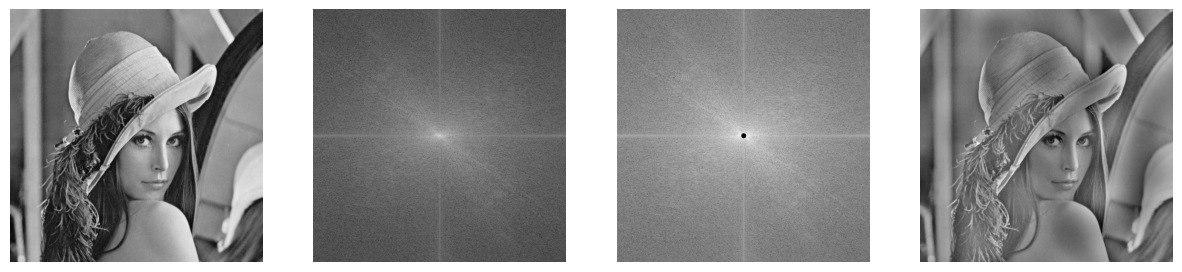



Current radius of filter is 15



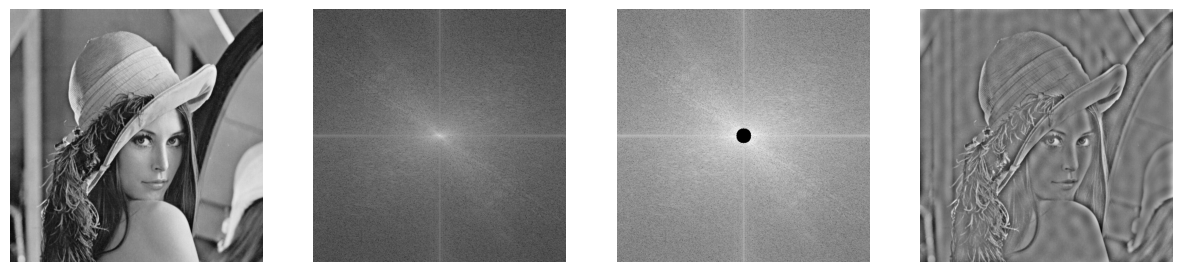



Current radius of filter is 30



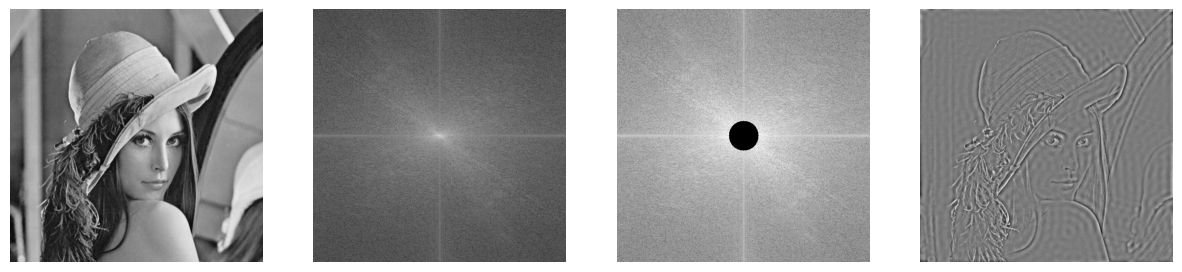



Current radius of filter is 255



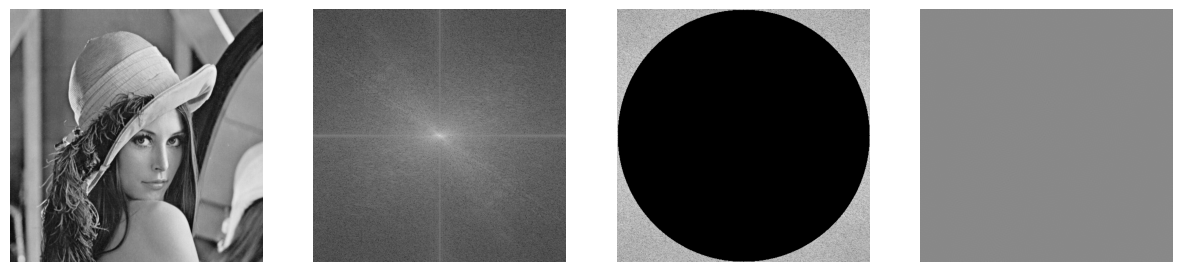

In [ ]:
for r in (5, 15, 30, 255):
  print(f'\n')
  print(f'Current radius of filter is {r}\n')
  filter = high_pass_filter(dft_shift, r)
  filtered_dft = dft_shift * filter
  fm = np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])) * filter[:,:,0]
  filtered_magnitude = cv2.magnitude(filtered_dft[:, :, 0], filtered_dft[:, :, 1])
  img_back = inverse_fourier_transform(filtered_dft)
  plot_imgs(lena_gray, magnitude, fm, img_back)

**Фильтр низких частот**



Current radius of filter is 5



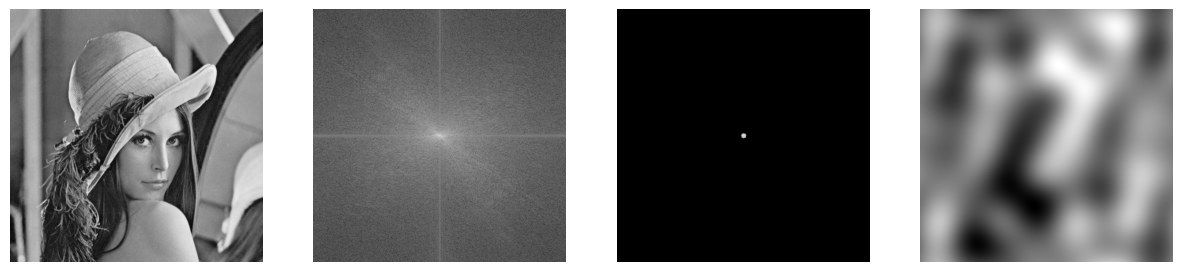



Current radius of filter is 15



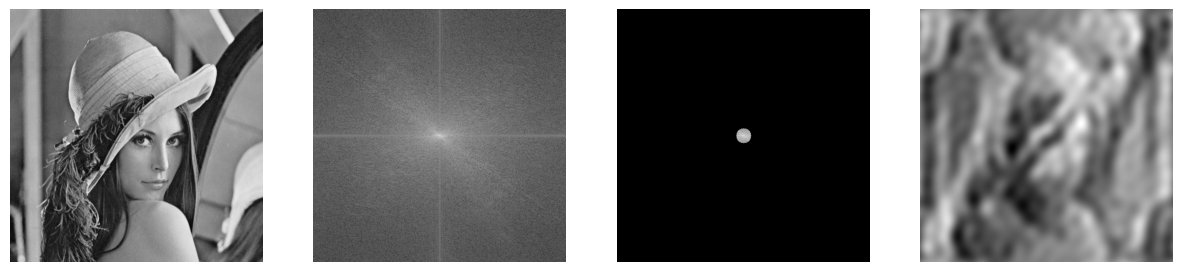



Current radius of filter is 30



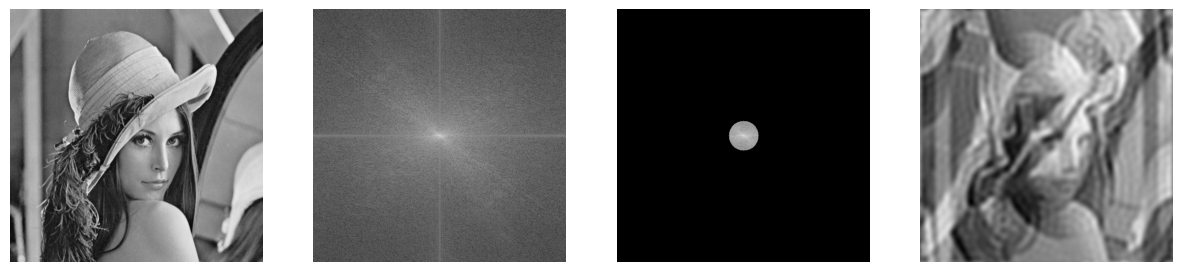



Current radius of filter is 255



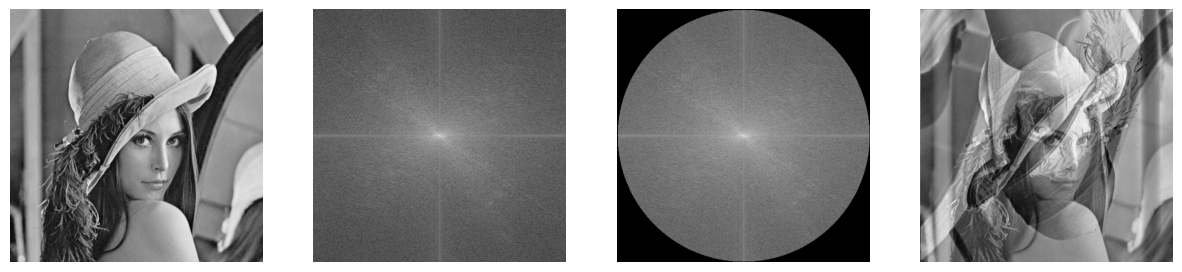

In [ ]:
for r in (5, 15, 30, 255):
  print(f'\n')
  print(f'Current radius of filter is {r}\n')
  filter = low_pass_filter(dft_shift, r)
  filtered_dft = dft_shift * filter
  fm = np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])) * filter[:,:,0]
  filtered_magnitude = cv2.magnitude(filtered_dft[:, :, 0], filtered_dft[:, :, 1])
  img_back = inverse_fourier_transform(filtered_dft)
  plot_imgs(lena_gray, magnitude, fm, img_back)

**2. (5 баллов)**

Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$, \url{http://en.wikipedia.org/wiki/Mean_squared_error}) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$.

3484.66450881958


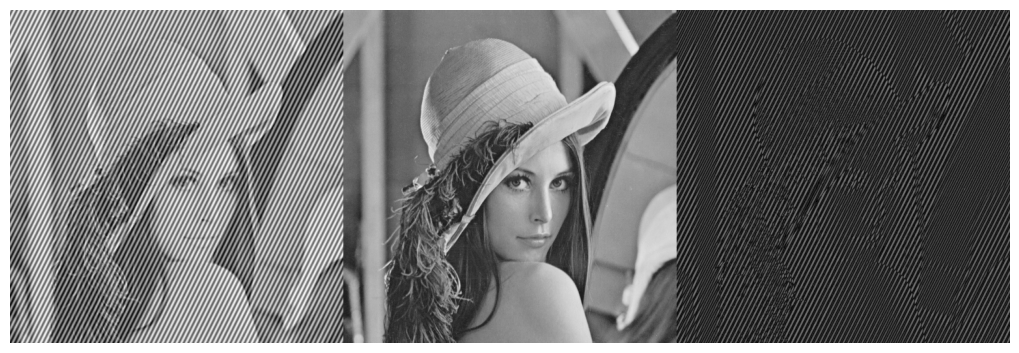

In [ ]:
lena_diag = cv2.imread(str(sources_path / "lena_diagonal.jpg"), 0)
lena_gray_fix = cv2.imread(str(sources_path / "lena_gray_512.tif"), 0)

print(mse(lena_diag, lena_gray_fix))
show_gray(np.hstack([lena_diag.astype(int), lena_gray_fix.astype(int), np.abs(lena_diag.astype(int) - lena_gray_fix.astype(int))]))

In [ ]:
dft = cv2.dft(np.float32(lena_diag), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude = np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

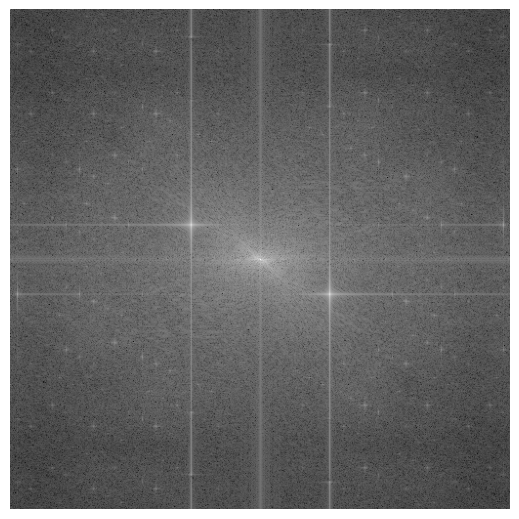

In [ ]:
show_gray(magnitude)

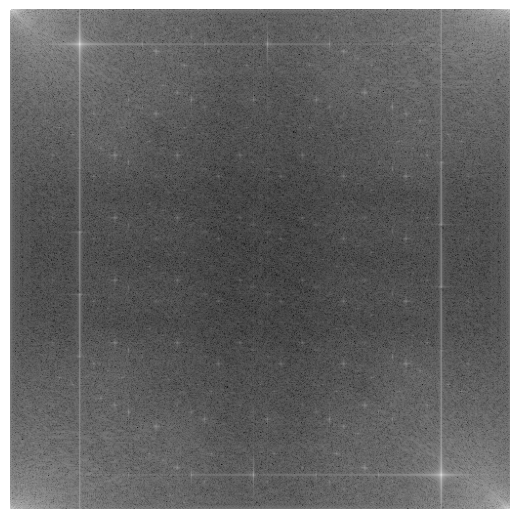

In [ ]:
show_gray(np.log(cv2.magnitude(dft[:, :, 0], dft[:, :, 1])))

In [ ]:
dft[:, -80:-70] = [0,0]
dft[:,70:80] = [0,0]
dft[-40:-30, :] = [0,0]
dft[30:40, :] = [0,0]

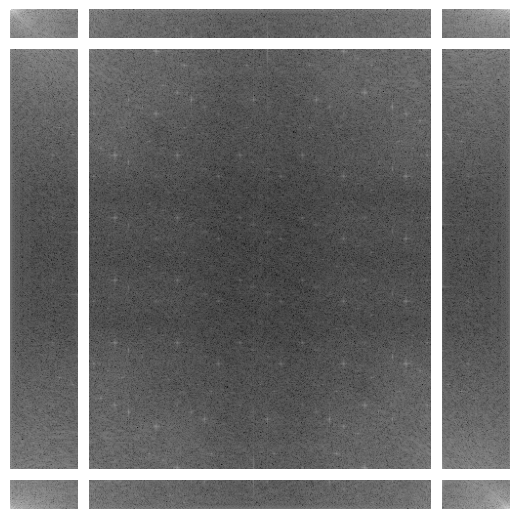

In [ ]:
show_gray(np.log(cv2.magnitude(dft[:, :, 0], dft[:, :, 1])))

In [ ]:
dft_shift = np.fft.fftshift(dft)
res = inverse_fourier_transform(dft_shift)

889.2465019226074


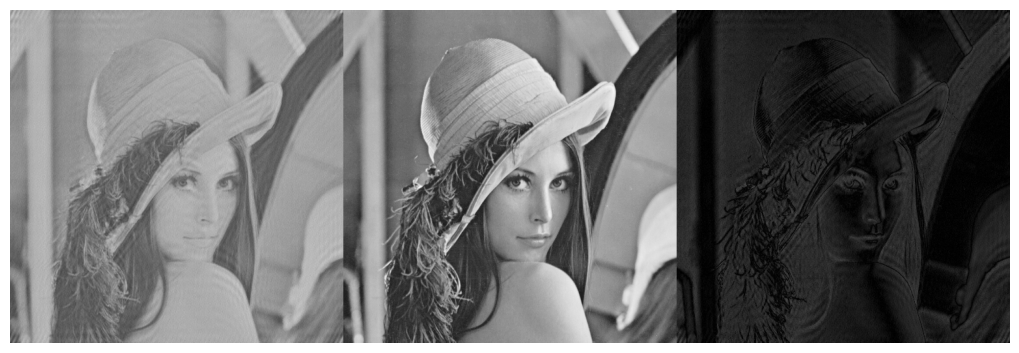

In [ ]:
print(mse(res, lena_gray_fix))
show_gray(np.hstack([res.astype(int), lena_gray_fix.astype(int), np.abs(res.astype(int) - lena_gray_fix.astype(int))]))

**3. (10 баллов)**

Теперь предложите решение, которое бы работало для любого шума подобной природы. (синусоида некотрой частоты под некоторым углом) Смоделируйте изображение с шумом и предложите универсальный алгоритм, который решит задачу.
Тот, у кого по результатам проверки будет наименьшее значение MSE для предлженной картинки, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)
Учтите, что помимо синусоидального шума, могут быть применены другие преобразования яркости.

---

Уточнение того, что требуется сделать:

* написать параметризованный генератор шума, которому можно задать произвольный угол, частоту полос и силу перекрытия, и получить шум с заданными параметрами

* усовершенствовать алгоритм из второй задачи, чтобы он работал на произвольных параметрах шума; тут полезно сделать интерактивный виджет, с помощью которого можно менять параметры шума и смотреть как справляется с ним алгоритм; интерактивный виджет проще всего сделать так:

    ```
    from ipywidgets import interact

    @interact(angle=(0, 360, 1), freq=(1, 64, 1))
    def anim_general_solution(angle=45, freq=32):
        # visualization code here
    ```

* после обобщенным алгоритмом отчистить изображение из задачи 2 и посчитать MSE с чистым изображением, по этому MSE и будет конкурс за призовую шоколадку

In [ ]:
def gen_noise(img, angle):
    img = img / 255
    x = np.arange(0, img.shape[0], 1)
    X, Y = np.meshgrid(x, x)
    angle = np.radians(angle)
    grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle))/20)
    show_gray(grating + img)

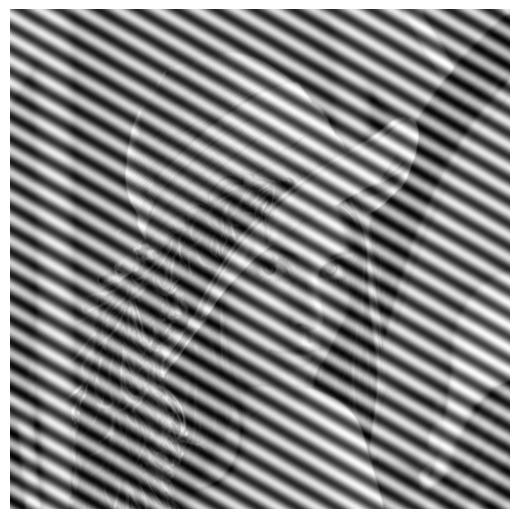

In [ ]:
gen_noise(lena_gray, 120)

**4. (5 баллов)**

Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

2184.1810162862143


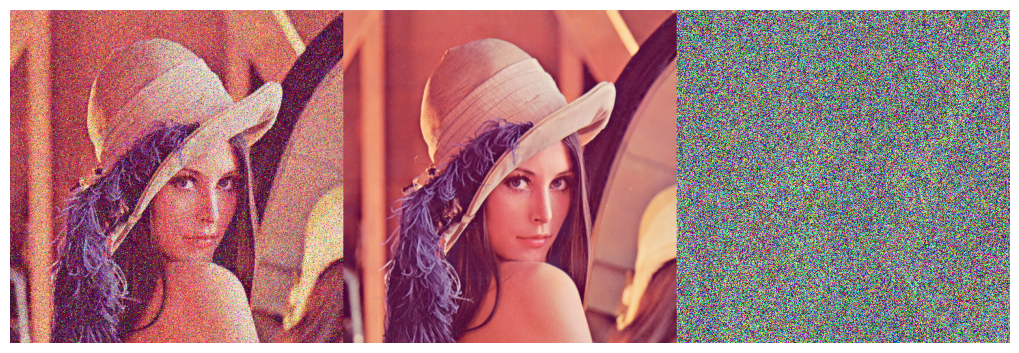

In [ ]:
img_noised = cv2.imread(str(sources_path / "lena_color_512-noise.tif"))
img_colored = cv2.imread(str(sources_path / "lena_color_512.tif"))

print(mse(img_noised, img_colored))
show_bgr(np.hstack([img_noised, img_colored, np.abs(img_noised - img_colored)]))

In [ ]:
res = cv2.medianBlur(img_noised,5)

In [ ]:
res = cv2.GaussianBlur(res, (5,5),2)

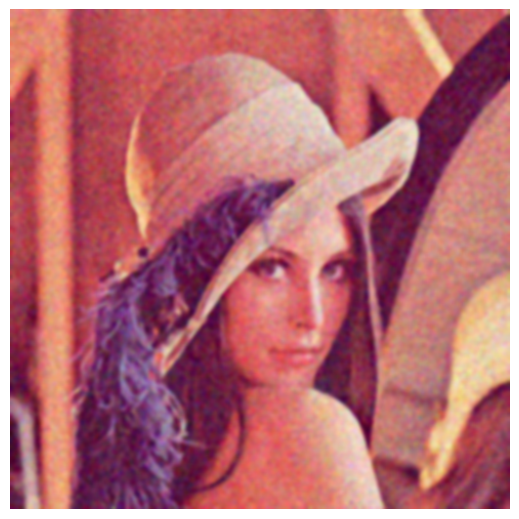

In [ ]:
show_bgr(res)

In [ ]:
print(mse(res, img_colored))

140.63425064086914


**5. (5 баллов)**

Выделите границы на изображении **cat.jpg**:

* при помощи градиента и фильтров собеля
* при помощи лапласиана
* используя алгоритм $canny$

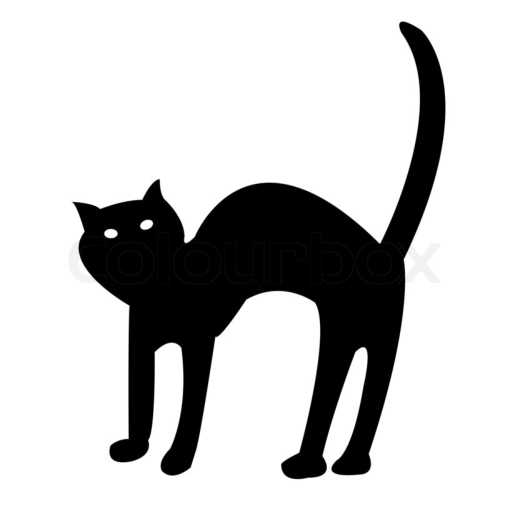

In [ ]:
img = cv2.imread(str(sources_path / "cat.jpg"), 0)
show_gray(img)

In [ ]:
dx = cv2.Sobel(img,-1, 1, 0)
dy = cv2.Sobel(img,-1, 0, 1)

In [ ]:
imgs = [img.astype('int64'), dx.astype('int64'), dy.astype('int64'), np.abs(dx.astype('int64') + dy.astype('int64'))]

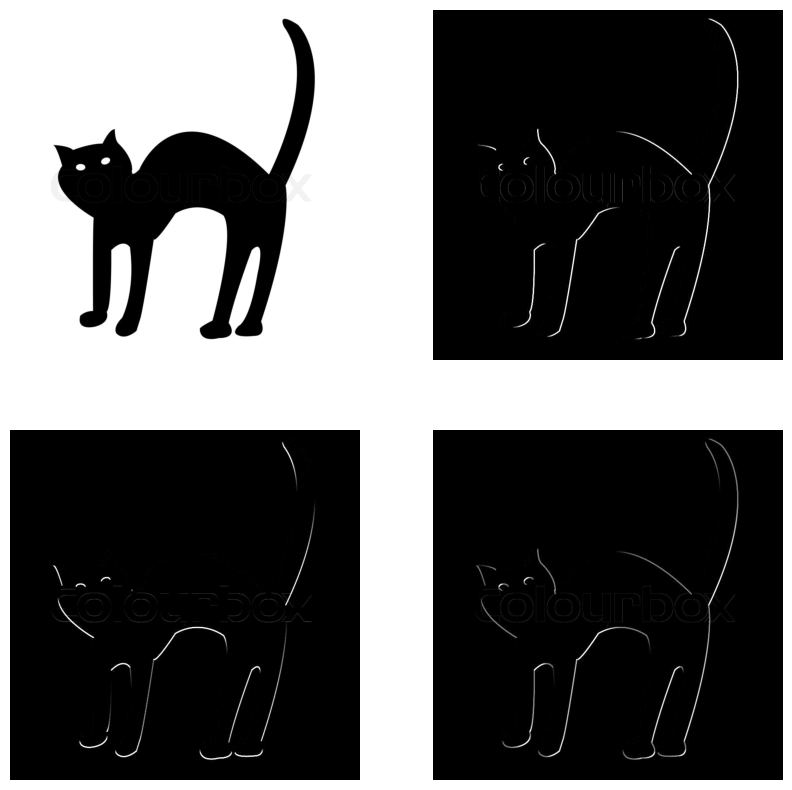

In [ ]:
fig = plt.figure(figsize=(10,10))
for i, im in enumerate(imgs):
  fig.add_subplot(2, 2, i + 1)
  plt.axis('off')
  plt.imshow(im, cmap='gray')
plt.show()

In [ ]:
src=cv2.GaussianBlur(img, (3,3),0)

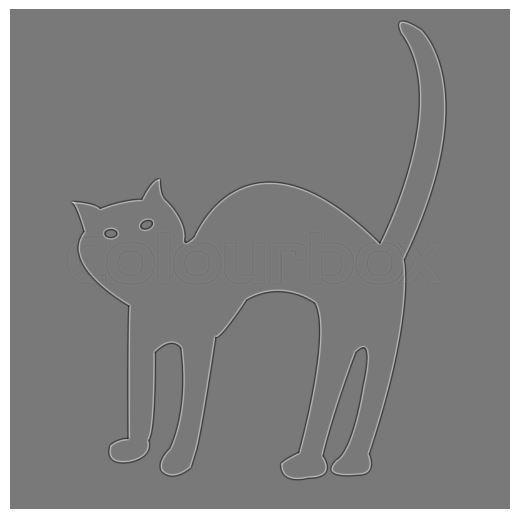

In [ ]:
 dst = cv2.Laplacian(src, cv2.CV_16S, ksize=3)
 show_gray(dst)

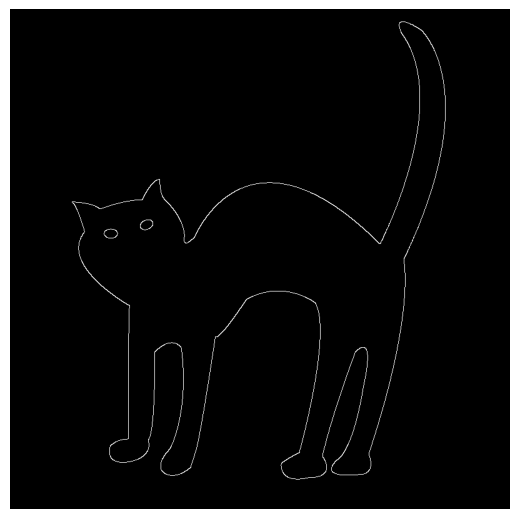

In [ ]:
res = cv2.Canny(img, 50, 255)
show_gray(res)